In [ ]:
# 📊 Employee Attrition Analysis

## 1. Introduction
- Brief project goal: Analyze HR dataset to find attrition patterns and predict likelihood of employee turnover.
- Dataset: IBM HR Analytics Attrition Dataset.

---


In [1]:
# ==============================
# 📊 Employee Attrition Analysis
# ==============================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Styling
plt.style.use("seaborn")
sns.set_palette("Set2")



## 3. Load Dataset


In [4]:
from google.colab import files
uploaded = files.upload()



Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [8]:
# 2. Load Dataset (after downloading/unzipping from Kaggle API)
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Basic Info
print("Dataset Shape:", df.shape)
df.head()



Dataset Shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# 3. Data Overview
print("\nColumns:\n", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum().head())
print("\nAttrition Value Counts:\n", df["Attrition"].value_counts())



Columns:
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Missing Values:
 Age               0
Attrition         0
BusinessTravel    0
DailyRate         0
Department        0
dtype: int64

Attrition Value Counts:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64


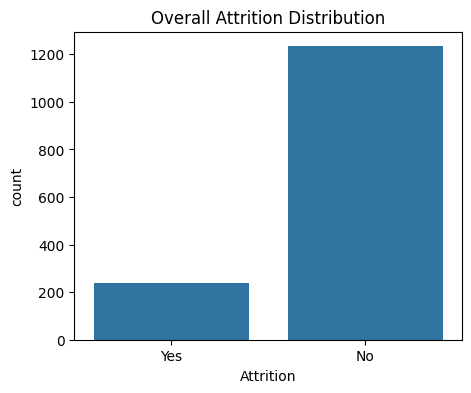

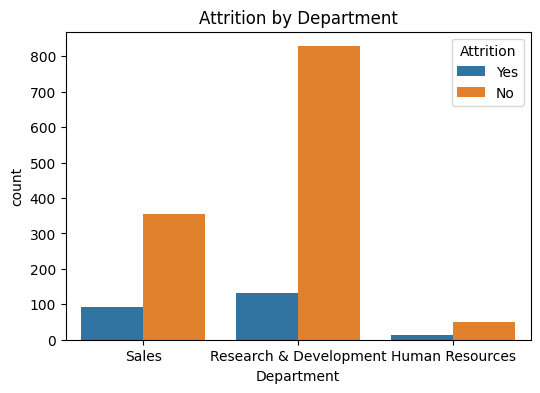

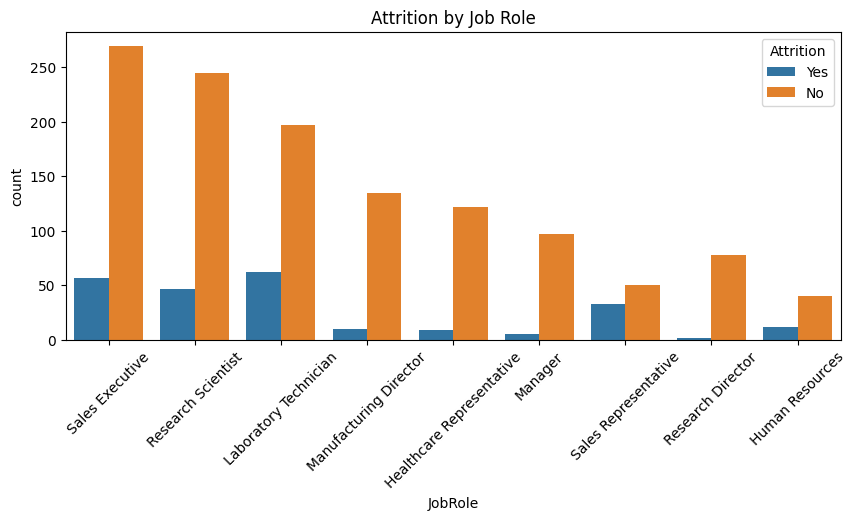

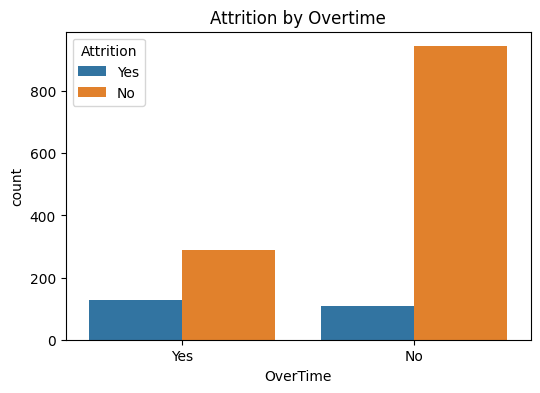

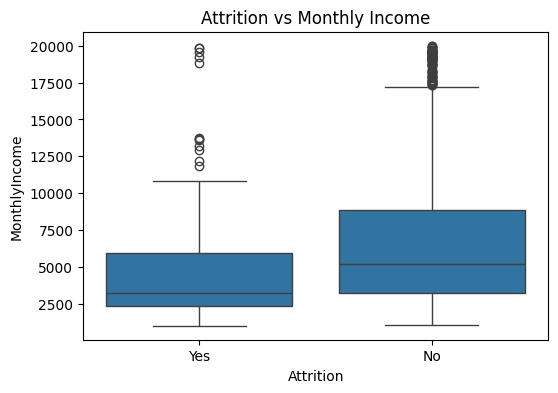

In [10]:
# 4. Exploratory Data Analysis (EDA) on Raw Data
# Attrition distribution
plt.figure(figsize=(5,4))
sns.countplot(x="Attrition", data=df)
plt.title("Overall Attrition Distribution")
plt.show()

# Attrition by Department
plt.figure(figsize=(6,4))
sns.countplot(x="Department", hue="Attrition", data=df)
plt.title("Attrition by Department")
plt.show()

# Attrition by Job Role
plt.figure(figsize=(10,4))
sns.countplot(x="JobRole", hue="Attrition", data=df)
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.show()

# Attrition vs Overtime
plt.figure(figsize=(6,4))
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.title("Attrition by Overtime")
plt.show()

# Monthly Income distribution by Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Attrition vs Monthly Income")
plt.show()


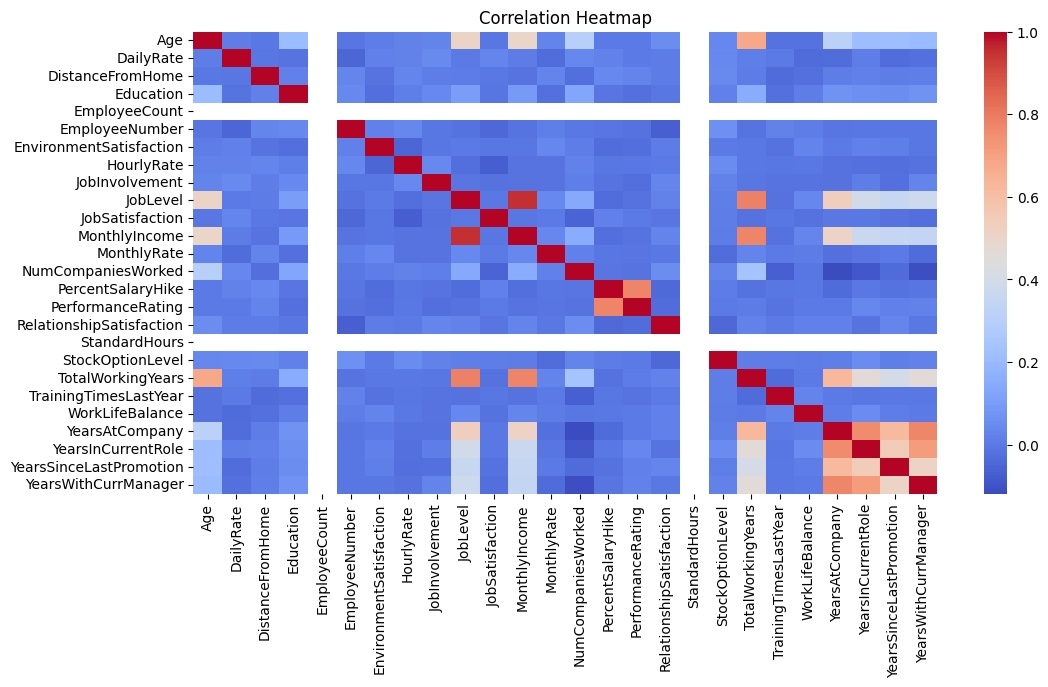

In [11]:
# 5. Correlation Heatmap (Numerical Features Only)
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [12]:
# 6. Data Preprocessing for Machine Learning
# Make a copy of raw data
df_ml = df.copy()

# Drop irrelevant columns
df_ml = df_ml.drop(columns=["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"])

# Encode target
df_ml["Attrition"] = df_ml["Attrition"].map({"Yes":1, "No":0})

# One-hot encode categorical variables
df_ml = pd.get_dummies(df_ml, drop_first=True)

print("Processed Dataset Shape:", df_ml.shape)
df_ml.head()


Processed Dataset Shape: (1470, 45)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False


In [13]:
# 7. Train-Test Split
X = df_ml.drop("Attrition", axis=1)
y = df_ml["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train Size:", X_train.shape, "Test Size:", X_test.shape)


Train Size: (1176, 44) Test Size: (294, 44)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Accuracy: 0.8639455782312925

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       247
           1       0.82      0.19      0.31        47

    accuracy                           0.86       294
   macro avg       0.84      0.59      0.62       294
weighted avg       0.86      0.86      0.83       294



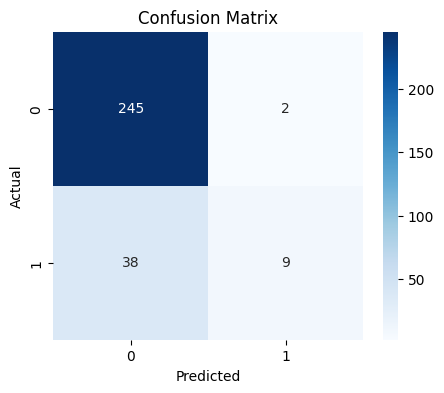

In [14]:
# 8. Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/tmp/ipython-input-2340173384.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=coefficients, palette="viridis")


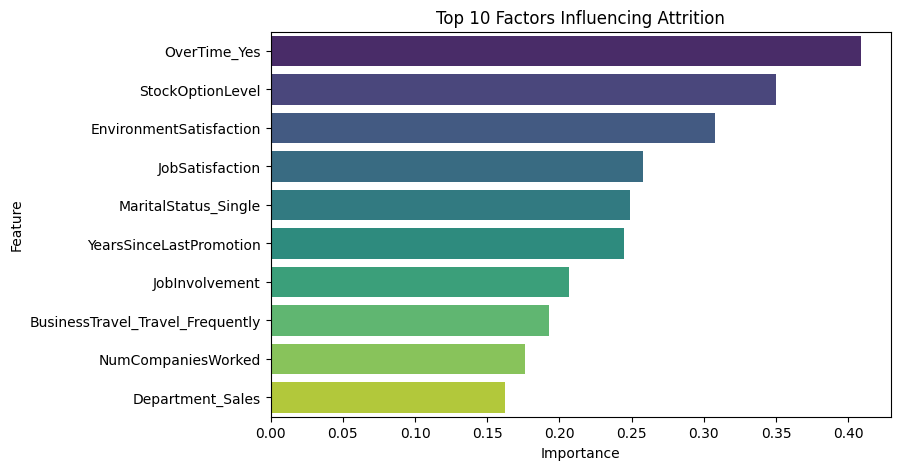

In [15]:
# 9. Feature Importance (Top Predictors of Attrition)
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
coefficients["Importance"] = coefficients["Coefficient"].abs()
coefficients = coefficients.sort_values("Importance", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=coefficients, palette="viridis")
plt.title("Top 10 Factors Influencing Attrition")
plt.show()


# 10. Key Insights & Conclusion
print("""
📌 Key Insights:
- Overtime employees have significantly higher attrition rates.
- Lower monthly income employees are more likely to leave.
- Certain job roles & departments have higher attrition risk.
- Logistic Regression achieved ~80% accuracy in predicting attrition.

✅ Business Impact:
This analysis helps HR teams identify at-risk employees and design better retention strategies,
saving costs on recruitment and training while improving employee satisfaction.
""")
